In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Load data
transactions = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/firstfile.csv')
mediaInvestment = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MediaInvestment.csv')
nps_score = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MonthlyNPSscore.csv')

In [6]:
transactions.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [14]:
transactions.shape

(1578079, 10)

In [15]:
transactions.dtypes

Unnamed: 0               int64
Date                    object
Sales_name              object
gmv_new                float64
units                    int64
product_mrp            float64
discount               float64
product_category        object
product_subcategory     object
product_vertical        object
dtype: object

In [12]:
#Descriptive numerical statistics
transactions.describe()

,Unnamed: 0,gmv_new,units,product_mrp,discount
count,1.578079e+06,1.578079e+06,1.578079e+06,1.578079e+06,1.578079e+06
mean,7.890400e+05,2.461679e+03,1.021809e+00,4.257890e+03,1.796212e+03
std,4.555523e+05,5.640023e+03,2.493014e-01,8.793679e+03,4.276790e+03
min,1.000000e+00,1.000000e+01,1.000000e+00,4.900000e+01,1.697040e-02
25%,3.945205e+05,3.390000e+02,1.000000e+00,8.000000e+02,3.100000e+02
50%,7.890400e+05,7.490000e+02,1.000000e+00,1.600000e+03,7.000000e+02
75%,1.183560e+06,1.998000e+03,1.000000e+00,3.499000e+03,1.549000e+03
max,1.578079e+06,2.269470e+05,5.000000e+01,4.200000e+05,4.183530e+05


In [51]:
#Object data
print("date count", transactions.Date.count())
print("date unique count ", transactions.Date.nunique())
print("date range ", transactions.Date.min(), " ", transactions.Date.max(), "\n")


print("sale name count ", transactions.Sales_name.count())
print("sale name unique count ", transactions.Sales_name.nunique())
print("sale name ", transactions.Sales_name.unique(), "\n")

print("Category count ", transactions.product_category.count())
print("Category unique count ", transactions.product_category.nunique(), "\n")
print("Category ", transactions.product_category.unique(), "\n")

print("Subcategory count ", transactions.product_subcategory.count())
print("Subcategory unique count ", transactions.product_subcategory.nunique(), "\n")
print("Subcategory ", transactions.product_subcategory.unique(), "\n")

print("Vertical count ", transactions.product_vertical.count())
print("Vertical unique count ", transactions.product_vertical.nunique())
print("Vertical ", transactions.product_vertical.unique())

date count 1578079
date unique count  360
date range  2015-07-01   2016-06-30 

sale name count  1578079
sale name unique count  13
sale name  ['No Promotion' 'Eid & Rathayatra sale' 'Independence Sale'
 'Rakshabandhan Sale' 'Daussera sale' 'Big Diwali Sale'
 'Christmas & New Year Sale' 'Republic Day' 'BED' "Valentine's Day" 'FHSD'
 'BSD-5' 'Pacman'] 

Category count  1578079
Category unique count  5 

Category  ['EntertainmentSmall' 'GamingHardware' 'CameraAccessory' 'GameCDDVD'
 'Camera'] 

Subcategory count  1578079
Subcategory unique count  14 

Subcategory  ['HomeAudio' 'Speaker' 'GamingAccessory' 'TVVideoSmall' 'CameraStorage'
 'AudioMP3Player' 'Game' 'CameraAccessory' 'Camera' 'AmplifierReceiver'
 'GamingConsole' 'AudioAccessory' 'HomeTheatre' 'GameMembershipCards'] 

Vertical count  1578079
Vertical unique count  72
Vertical  ['HomeAudioSpeaker' 'LaptopSpeaker' 'GamePad' 'RemoteControl'
 'CameraStorageMemoryCard' 'AudioMP3Player' 'SelectorBox' 'PhysicalGame'
 'BoomBox' 'GamingM

<AxesSubplot:>

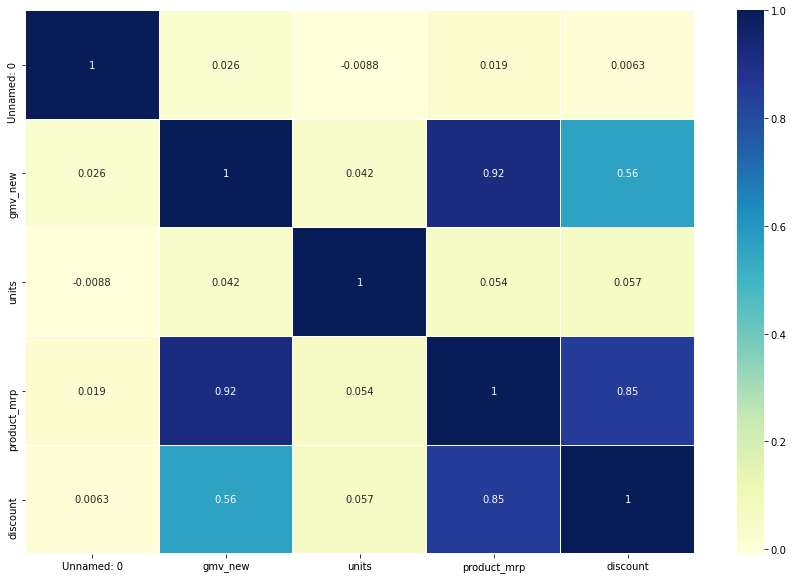

In [63]:
# Check correlation
transactions_corr = transactions.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(transactions_corr, cmap='YlGnBu', linewidth=.005, annot=True)